# **Modelling MBTI with XGBoost**
###Visualizing with WordCloud

In [4]:
from google.colab import files
uploaded = files.upload()

Saving mbti_1.csv to mbti_1 (1).csv


In [5]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['mbti_1.csv']))
print(uploaded.keys())

dict_keys(['mbti_1.csv'])


In [8]:
df.head() #Performing minor EDA

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [10]:
df.isna().sum()

type     0
posts    0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


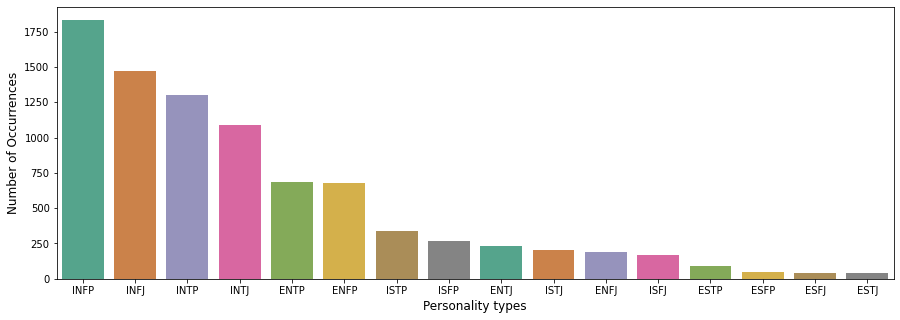

In [12]:
cnt_types = df['type'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8,palette='Dark2')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Personality types', fontsize=12)
sns.set()
plt.show()


In [13]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

df = df.join(df.apply (lambda row: get_types (row),axis=1))

In [14]:
df.head()

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [15]:
#Separately counting each and every data type
print ("Introversion (I) /  Extroversion (E):\t", df['IE'].value_counts()[0], " / ", df['IE'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676


In [16]:
print ("Intuition (N) / Sensing (S):\t\t", df['NS'].value_counts()[0], " / ", df['NS'].value_counts()[1])


Intuition (N) / Sensing (S):		 1197  /  7478


In [17]:
print ("Thinking (T) / Feeling (F):\t\t", df['TF'].value_counts()[0], " / ", df['TF'].value_counts()[1])


Thinking (T) / Feeling (F):		 4694  /  3981


In [18]:
print ("Judging (J) / Perceiving (P):\t\t", df['JP'].value_counts()[0], " / ", df['JP'].value_counts()[1])

Judging (J) / Perceiving (P):		 5241  /  3434


In [19]:
#Printing the correlation matrix
##This helps us check the linear relationship between the pairs of persona traits
corr = df[['IE','NS','TF','JP']].corr()
print(corr)

          IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000


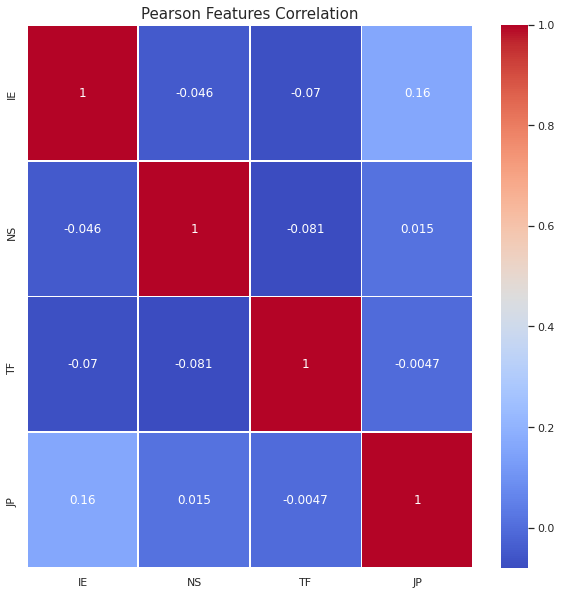

In [20]:
plt.figure(figsize=(10,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap="coolwarm",  annot=True, linewidths=1)

In [21]:
import numpy as np
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    #MBTI to binary vector
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    #binary vector to MBTI personality
    
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

#Checking
d = df.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [22]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True


**Text Preprocessing using NLTK**

In [23]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize


unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
unique_type_list = [x.lower() for x in unique_type_list]


In [24]:
#Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

#Removing stopwords
cachedStopWords = stopwords.words("english")

In [25]:
import re

In [26]:
def pre_process_data(df, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(df)
    i=0
    
    for row in df.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##Removing stop-words, cleaning comments, lowercasing all characters
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [27]:
list_posts, list_personality  = pre_process_data(df, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


**Text Data Vectorization using CountVectorizer and TFIDF**

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
cnt = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

# Learning the vocabulary dictionary and return term-document matrix
print("Tokenizing words using CountVectorizer...")
X_cnt = cnt.fit_transform(list_posts)

# Transforming the count matrix to a normalized tf or tf-idf representation
tf = TfidfTransformer()

print("Measuring their statistical relevance using TF-IDF...")
# Learning the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tf.fit_transform(X_cnt).toarray()

Tokenizing words using CountVectorizer...
Measuring their statistical relevance using TF-IDF...


In [29]:
feature_names = list(enumerate(cnt.get_feature_names()))

In [30]:
#Checking the dimensions of the feature vector
X_tfidf.shape

(8675, 791)

**Performing XGBoost Classification**

In [31]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

print("\t\t Printing the four major dimensions of personality classification in MBTI:")
for l in range(len(type_indicators)):
    print("\t\t\t\t\t"+type_indicators[l])

		 Printing the four major dimensions of personality classification in MBTI:
					IE: Introversion (I) / Extroversion (E)
					NS: Intuition (N) – Sensing (S)
					FT: Feeling (F) - Thinking (T)
					JP: Judging (J) – Perceiving (P)


In [32]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])


MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


In [33]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
X = X_tfidf

# Training type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))

   #Selecting individual personality targets
    Y = list_personality[:,l]

    #Splitting our data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=21)

    #Fitting our model
    model = XGBClassifier()
    model.fit(X_train, y_train)
    print("...\nTraining complete")

    #Predicting on our test set
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    #Calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
...
Training complete
* IE: Introversion (I) / Extroversion (E) Accuracy: 77.53%
NS: Intuition (N) – Sensing (S) ...
...
Training complete
* NS: Intuition (N) – Sensing (S) Accuracy: 87.21%
FT: Feeling (F) - Thinking (T) ...
...
Training complete
* FT: Feeling (F) - Thinking (T) Accuracy: 75.69%
JP: Judging (J) – Perceiving (P) ...
...
Training complete
* JP: Judging (J) – Perceiving (P) Accuracy: 67.05%


In [35]:
#Checking the default values of the XGBoost Algo
default_get_xgb_params = model.get_xgb_params()
print (default_get_xgb_params)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}


**Adjusting parameters according to our datatset**

In [36]:
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#Training type indicator individually
for l in range(len(type_indicators)):
    print("%s :\n\n" % (type_indicators[l]))
    
    Y = list_personality[:,l]

    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=21)

    #Fitting our model
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    #Analysis on test set
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    #Calculating accuracy individually
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) :


* IE: Introversion (I) / Extroversion (E) Accuracy: 77.65%
NS: Intuition (N) – Sensing (S) :


* NS: Intuition (N) – Sensing (S) Accuracy: 87.21%
FT: Feeling (F) - Thinking (T) :


* FT: Feeling (F) - Thinking (T) Accuracy: 76.84%
JP: Judging (J) – Perceiving (P) :


* JP: Judging (J) – Perceiving (P) Accuracy: 68.09%


In [99]:
#Experimenting with my own words
def predict_mbti():
  my_posts  = input("\nEnter your answer:")

  mydata = pd.DataFrame(data={'type': ['ENTP'], 'posts': [my_posts]})

  my_posts, dummy  = pre_process_data(mydata, remove_stop_words=True)

  my_X_cnt = cnt.transform(my_posts)
  my_X_tfidf =  tf.transform(my_X_cnt).toarray()

  result = []
  #Training type vector indivudually
  for l in range(len(type_indicators)):
      print("%s : Training complete.\n " % (type_indicators[l]))
    
      Y = list_personality[:,l]

      #Train-Test-Split
      X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=21)

      #Fitting our model
      model = XGBClassifier(**param)
      model.fit(X_train, y_train)
      
      #Running the test sets
      y_pred = model.predict(my_X_tfidf)
      result.append(y_pred[0])
  
  print("\n\nThe result is: ", translate_back(result))
  a=str(translate_back(result))
  from imageio import imread
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  from PIL import Image
  brain_mask = np.array(Image.open("head3.jpg"))
 

  df_4 = df[df['type'] == a]
  wordcloud = WordCloud(background_color="white", max_words=2000,mask=brain_mask).generate(df_4['posts'].to_string())
  image_colors = ImageColorGenerator(brain_mask)
  plt.imshow(wordcloud)
  plt.title(a)
  plt.axis("off")


Enter your answer:Sharp pain emanating from his left shoulder blade caused him to jerk awake from his sleep. Clutching his back, he shot up in a sitting position, covered in cold sweat.  It was winter solstice again, the darkest night of the year.  Sighing, he could only recall a gunshot, and a icy voice, saying:  “It’s been a while, since I have extracted a ba without a contract. I will make sure you never eavesdrop into, ah- ’grown up discussions’, again.”  He abhorred the memory in every way possible, if he could call it a memory. He knew that this incident never happened in his life, and this started ever since he agreed to be a part of the lucid-dream cultivation research that his crazy Professor was conducting.  Even though he wasn’t a part of his research anymore, once this started, it never stopped.   He had thoroughly searched what a ba was, it was from ancient Egyptian scriptures, apparently some ability of the soul to fly. Along with a the ka, the armour of the soul and the

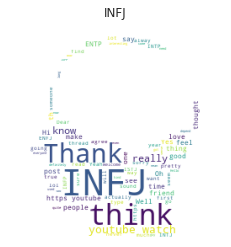

In [82]:
predict()

In [91]:
from sklearn.externals import joblib

joblib.dump(model, 'model_pickeled')

['model_pickeled']

In [92]:
mj = joblib.load('model_pickeled')


Enter your answer:I love to eat lasagna and I wanna eat chocolates for desserts I am thinking of buying a deep dish pizza when I am in Chicago and while I am on it I will hit the library and read up stuff for my new project that my professor has given me for Religious Symbology class I am thinking of buying a coffee on the way and hey on the way I might hit up Starbucks in a park.
1 of 1 rows
IE: Introversion (I) / Extroversion (E) : Training complete.
 
NS: Intuition (N) – Sensing (S) : Training complete.
 
FT: Feeling (F) - Thinking (T) : Training complete.
 
JP: Judging (J) – Perceiving (P) : Training complete.
 


The result is:  INTP


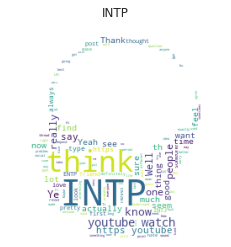

In [101]:
predict_mbti()